In [2]:
# if you did successfully installed requirements pip install -r requirements.txt  you should have no error running below:

import pandas as pd
import numpy as np    ###Characters and strings 
import matplotlib.pyplot as plt   ####Visualization

### Before we get started with the Chiptole Exercise, we will create a dataframe object from arrays, lists, and even dictionaries so you can see how a dataframe can be created from various objects

#### Array --> Dataframe

In [3]:
#creating a dataframe from an array (5X3 Matrix)
#an array is lists of lists

array = np.random.rand(5,3)
array

array([[0.84331731, 0.81758118, 0.59316443],
       [0.18062535, 0.35632411, 0.30929683],
       [0.58925359, 0.4472257 , 0.65569112],
       [0.3792485 , 0.40489324, 0.72067887],
       [0.55999531, 0.2835754 , 0.34257342]])

In [4]:
#adding columns to your array
columns_new = ['one','two','three']
df = pd.DataFrame(array,columns=columns_new)   # for Data frame -

df

,one,two,three
0,0.843317,0.817581,0.593164
1,0.180625,0.356324,0.309297
2,0.589254,0.447226,0.655691
3,0.379248,0.404893,0.720679
4,0.559995,0.283575,0.342573


#### Dictionary --> DataFrame

In [5]:
populations = {
    'state': ['Florida','Texas','California','North Carolina', 'Virginia'],
    'population':[30.0,28.3,39.5,10.3,8.5]
}

columns_new = ['state','population']

df2 = pd.DataFrame(populations,columns=columns_new)

In [6]:
#Lets sort the dataframe

df2.sort_values(by=['population'],ascending=False)

,state,population
2,California,39.5
0,Florida,30.0
1,Texas,28.3
3,North Carolina,10.3
4,Virginia,8.5


In [261]:
#What happened to the index? ^ Use below to resolve
df2 = df2.sort_values(by=['population'],ascending=False).reset_index(drop=True)

df2

,state,population
0,California,39.5
1,Florida,30.0
2,Texas,28.3
3,North Carolina,10.3
4,Virginia,8.5


#### Now your turn with a List --> DataFrame, remeber to use shift tab when looking at pd.Dataframe()

In [12]:
states_population = [['California',39.5],['Texas',28.3],['Florida',30.0],['North Carolina',10.3],
                    ['Virginia',8.5]]

In [13]:
#populations1 = {
 #   'state': ['California','Texas','Florida','North Carolina', 'Virginia'],
  #  'population':[39.5,28.3,30.0,10.3,8.5]
#}
df3=pd.DataFrame(states_population, columns=columns_new).sort_values(by=['population'],ascending=False).reset_index(drop=True)
df3

,state,population
0,California,39.5
1,Florida,30.0
2,Texas,28.3
3,North Carolina,10.3
4,Virginia,8.5


## Now that you know how to create a Dataframe (Congrats!) let's see how we can explore data from Chipotle


In [14]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

orders = pd.read_csv(url,sep='\t',encoding="utf-8-sig")

### Look at the first 15 entries

In [15]:
orders.head(15)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### How many rows and columns are we dealing with?

In [16]:
orders.shape

(4622, 5)

### How many null values are we dealing with?

In [17]:
orders.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

### How do we select rows vs columns?

In [21]:
#Rows,Columns

orders.iloc[2,3] #selects the value in 2nd row and 3rd column   ###iloc  - index Location
orders.iloc[:,2] #selects all the rows of one column    ----

#uses the index, right now its just integers 
orders.loc[0]    #give me the first row of the location
orders.item_name


0                Chips and Fresh Tomato Salsa
1                                        Izze
2                            Nantucket Nectar
3       Chips and Tomatillo-Green Chili Salsa
4                                Chicken Bowl
5                                Chicken Bowl
6                               Side of Chips
7                               Steak Burrito
8                            Steak Soft Tacos
9                               Steak Burrito
10                        Chips and Guacamole
11                       Chicken Crispy Tacos
12                         Chicken Soft Tacos
13                               Chicken Bowl
14                        Chips and Guacamole
15      Chips and Tomatillo-Green Chili Salsa
16                            Chicken Burrito
17                            Chicken Burrito
18                                Canned Soda
19                               Chicken Bowl
20                        Chips and Guacamole
21                           Barba

## What questions could we answer based on the columns?


#### 1. What are some statistics about orders? 
            - Distribution of quantity for orders
            - Average quantity of orders
            - Average order price

#### 2. What is the most ordered item?

In [22]:
orders.groupby('order_id').quantity.sum().describe()
####Distribution of quantity for orders  --
###Average quantity of orders    2.7
#####Average order price

count    1834.000000
mean        2.711014
std         1.677624
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        35.000000
Name: quantity, dtype: float64

#### What looks odd about  ^ this? Yes an order with 35 Items lets check that out...

In [23]:
orders.groupby('order_id').quantity.sum().sort_values().tail(1)  ####Sorting Ascending

order_id
1443    35
Name: quantity, dtype: int64

In [24]:
orders[orders['order_id'] == 1443]   ####find the value for the last row   or filtering by order id

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,$44.25
3599,1443,7,Bottled Water,NaN,$10.50
3600,1443,1,6 Pack Soft Drink,[Coke],$6.49
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$33.75
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",$35.00
3603,1443,3,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",$27.75
3604,1443,2,Bottled Water,NaN,$3.00


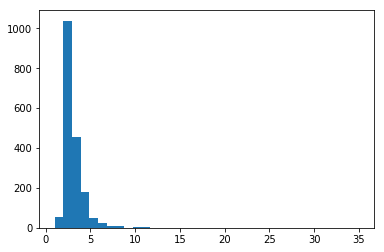

In [27]:
plt.hist(orders.groupby('order_id').quantity.sum(),bins=35)     ####hist - histogram as method
plt.show()

#### Now what is the average order price? You can take what we did to average order quantity to the different column

In [33]:
###orders.groupby('order_id').item_price.describe()

orders['new_item_price']=orders['item_price'].map(lambda x: x.strip("$"))     ###Lambda is like for loop, strip:to remove $sign
orders['new_item_price']=orders['new_item_price'].apply(lambda x:float(x))   ###convert from string to float
orders.head()
orders.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price             object
new_item_price        float64
dtype: object

#### Why didn't it work? ^ Remember you can only perform math to numers or floats not objects. Check the datatype

In [36]:
#orders.groupby('order_id').new_item_price.mean()
orders.groupby('order_id').new_item_price.sum().describe()

count    1834.000000
mean       18.811429
std        11.652512
min        10.080000
25%        12.572500
50%        16.200000
75%        21.960000
max       205.250000
Name: new_item_price, dtype: float64

In [275]:
#Create a new column or convert the current column into a price


order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price             object
new_item_price        float64
dtype: object

count    1834.000000
mean       18.811429
std        11.652512
min        10.080000
25%        12.572500
50%        16.200000
75%        21.960000
max       205.250000
Name: new_item_price, dtype: float64

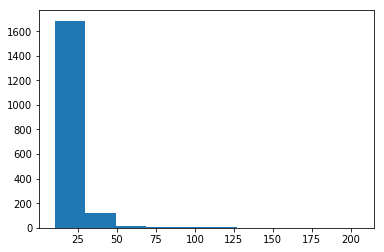

### Before we answer #2 we have to make sure that the data is clean, how would we approach making sure the data is clean for most ordered item?

In [279]:
orders.item_name.unique()


array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

In [280]:
len(orders.item_name.unique())

50

In [37]:
orders['item_name_clean']=orders['item_name'].str.replace('-'," ")

In [39]:
len(orders.item_name_clean.unique())

47

In [42]:
orders.groupby('item_name_clean').quantity.sum().sort_values().tail(1)

item_name_clean
Chicken Bowl    761
Name: quantity, dtype: int64

### Take away HW Advanced: How would we figure out what type of product sells more eg: Burrito vs Tacos vs Drinks vs Chips vs Bowls vs Salads?


#### Create a new column that summarizes the order a bit better eg: [Burrito, Bowl, Salad, Tacos, Salsa, Chips, Drink, Other]